# Test Dataset Notebook

This notebook tests the `VigorDataset` from `src/data/datasets.py`. We will:

- Instantiate the training dataset (with `same_area=True` or `False` depending on what we want to test).
- Display a few samples.
- Check that the dataset logic is correct and that images and captions align.



In [1]:
import sys
import os
from pathlib import Path

# If needed, add the project root to sys.path so we can import from src
project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root / 'src'))

from data.vigor_plus import VigorDataset
from torchvision import transforms
import matplotlib.pyplot as plt
import torch


In [2]:
ground_transforms = transforms.Compose([
    transforms.Resize((256, 512)),
    transforms.ToTensor(),
])

satellite_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])


In [3]:
data_folder = "/home/erzurumlu.1/yunus/research_drive/data/VIGOR"  # Adjust this to your actual data directory
dataset = VigorDataset(
    data_folder=data_folder,
    split='Train',         # or 'val', depending on what you want to test
    same_area=False,        # set to False if you want to test cross-area splits
    ground_transforms=ground_transforms,
    satellite_transforms=satellite_transforms,
    use_captions=True
)

print(f"Dataset length: {len(dataset)}")


Dataset length: 53694


Label (satellite index): 3867
Ground Caption: A wide road intersects with a secondary street, forming a T-junction. High-rise buildings dominate the skyline to the right, while the left has open parking spaces. Trees line both sides, with a structure in the distance. Buildings and roads form a clear urban grid, integrating natural elements.
Satellite Caption: A park with a circular pathway design sits right of a major road. Trees line the street, providing shade. To the left, parking lots and smaller buildings are visible. The park includes open green spaces, contrasting urban elements. A large building is below the park, adjacent to the road.


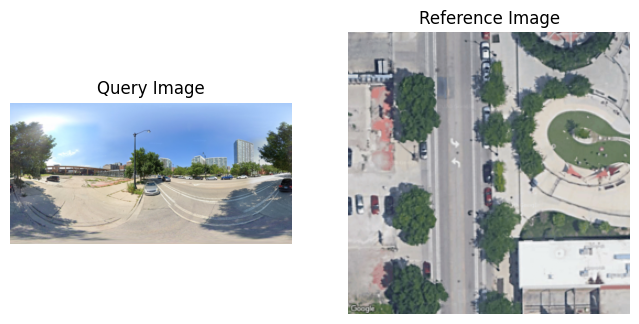

In [4]:
index_to_test = 0
ground_img, satellite_img, label, ground_caption, sat_caption = dataset[index_to_test]

print(f"Label (satellite index): {label.item()}")
print(f"Ground Caption: {ground_caption}")
print(f"Satellite Caption: {sat_caption}")

# query_img and reference_img are tensors of shape [C, H, W]. Convert them to [H, W, C] for visualization.
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(ground_img.permute(1,2,0))
axes[0].set_title("Query Image")
axes[0].axis('off')

axes[1].imshow(satellite_img.permute(1,2,0))
axes[1].set_title("Reference Image")
axes[1].axis('off')

plt.show()


In [5]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
batch = next(iter(dataloader))

ground_batch, satellite_batch, label_batch, ground_captions, sat_captions = batch
print("Query batch shape:", ground_batch.shape)
print("Reference batch shape:", satellite_batch.shape)
print("Label batch shape:", label_batch.shape)
print("Ground captions:", ground_captions)
print("Satellite captions:", sat_captions)


Query batch shape: torch.Size([4, 3, 256, 512])
Reference batch shape: torch.Size([4, 3, 256, 256])
Label batch shape: torch.Size([4])
Ground captions: ('The scene features a wide road with multiple lanes, intersecting at a junction near tall city buildings. Skyscrapers line the right, while a park with lush trees is further back. A parking lot is to the left. Natural light enhances the open sky above the urban landscape.', 'Intersecting streets form a grid layout with residential buildings on both sides. Notable buildings with bay windows and pastel colors are present. Trees sporadically line the sidewalks. Cars are parked along the streets. No visible landmarks or natural features intersect the urban area. Streets extend diagonally across, forming a cohesive neighborhood scene.', 'Colorful houses line a hilly street with a clear sky overhead. The road curves, connecting narrow intersections. Cars are parked along both sides, and a few trees are visible. Homes vary in style and color,